In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta 
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbtpro as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from ma_triple import get_data,Strategy
# plt.style.use('seaborn')
df_dict = {}

In [2]:
df_dict = {}
candidate = ['ETH','BTC','BNB','SOL','MATIC',
               'XRP','DYDX','AVAX','LINK','GAS',
               'DOGE','ORDI','TRB','WLD','ADA',
               'OP','FIL','ZRX','LTC','RUNE','ATOM',
               'ARB','GMT','ETC','ARK','BCH','DOT',
               'LDO','SUI','GALA','CAKE',
               'APE','INJ','FTM','APT','YFI','OMG',
               'SEI','EOS','1000SHIB','NEAR',
               'MKR','CYBER','UNI',
               'BLUR','SUSHI','WAVES','MASK','MANA',
               'EGLD','AAVE','NEO','FET','TRX','GRT','ALGO','STX','XLM']
for coin in candidate:
    df_dict[coin] = pd.read_hdf(f'/Users/johnsonhsiao/Desktop/data/{coin}USDT_PERPETUAL.h5')

APY: 262.19 %
MDD: 30.41 %
MDD Duration 100 days 20:00:00
worst trade: -13.34 %
2023-11-11 04:00:00 ~ 2023-11-14 08:00:00
avg holding days: 4.97 days
--------------------------------------------
PF: 3.24
Sharpe Ratio: 2.12
Calmar Ratio: 7.17
Sortino Ratio: 3.64
Omega Ratio: 1.24
--------------------------------------------
Expectancy : 6.13 %
Total Time Exposure : 58.15 %
Total Trades: 54
Win Rate: 46.30 %
--------------------------------------------
PF * Win Rate: 1.498


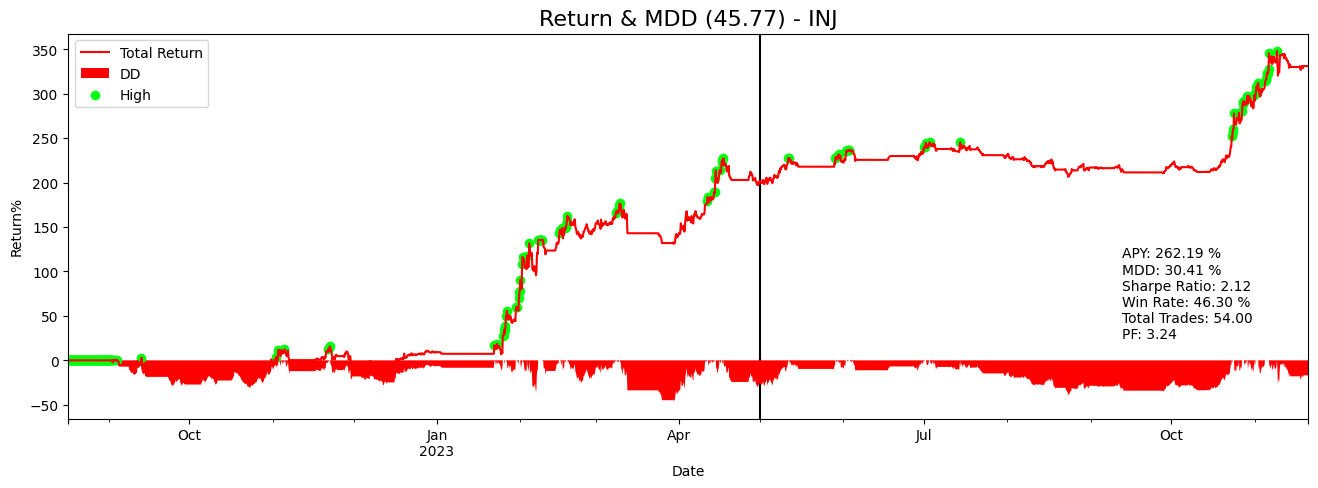

(None,
 Start                               2022-08-17 00:00:00
 End                                 2023-11-21 00:00:00
 Period                                461 days 04:00:00
 Start Value                                     10000.0
 Min Value                                   7167.683526
 Max Value                                  44804.723396
 End Value                                  43115.491298
 Total Return [%]                             331.154913
 Benchmark Return [%]                         644.449649
 Total Time Exposure [%]                       58.149621
 Max Gross Exposure [%]                       124.569288
 Max Drawdown [%]                              30.408097
 Max Drawdown Duration                 100 days 20:00:00
 Total Orders                                         97
 Total Fees Paid                               322.89726
 Total Trades                                         54
 Win Rate [%]                                  46.296296
 Best Trade [%]         

In [46]:
start = '2022-01-01'
sep = ''
end = ''

params = {"short_window": 20,
        "middle_window": 8,
        "long_window": 56}

side = 'long'
config = {'freq':'4h', 'lag':1, 'fee': 0.0003,'weekend_filter':False}
coin = 'INJ'

# 5m : RUNE{"short_window": 20,"middle_window": 56,"long_window": 32}both
# 5m : RUNE{"short_window": 44,"middle_window": 44,"long_window": 44}long
# 15m : AVAX{"short_window": 44,"middle_window": 44,"long_window": 44}short
# 15m : RUNE{"short_window": 12,"middle_window": 12,"long_window": 18}long
# 1h : INJ{"short_window": 32,"middle_window": 12,"long_window": 56}long
# 4h : INJ{"short_window": 20,"middle_window": 8,"long_window": 56}long


df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
# analyze.show_period_analysis(trades)
analyze.show_pf_analysis(params, side, coin, axv_index=['2023-05-01'])

In [34]:
import warnings
warnings.filterwarnings("ignore")

start= '2022-01-01'
end ='2023-11-20'

symbol_list = ['INJ']
sample_sets = [[start,end]]
# freq = '1h'

params = {"short_window": [4,40,4],
        "middle_window":[4,60,4],
        "long_window": [4,60,4]}
    
config = {'freq':'1h','fee': 0.0003,'weekend_filter':False}
multi_test = MultiTester(
    Strategy,
    get_data_func=get_data,
    df_dict=df_dict,
    params=params,
    config=config,
    symbol_list=symbol_list,
    start=start,
    end=end
    )

all_params = multi_test.multi_params(symbol_list,sample_sets,direction='long')
trades, value_df = multi_test.multi_params_result(all_params)


======================= INJ LONG Optimize Test =======================
Optimization trails: 1764


100%|██████████| 1764/1764 [00:44<00:00, 39.71it/s]


Optimization time: 44.74 sec
---------- INJ LONG ----------
{'short_window': 32, 'middle_window': 12, 'long_window': 56}
+------------+-----------+----------+----------+------------+---------+------------+
| datetime   |   收益率% |     毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+----------+----------+------------+---------+------------|
| 2022-09    |     -8.59 |  1786.24 | -2859.25 |       0.62 |   37.5  |          8 |
| 2022-12    |     50.29 |  5594.95 |  -732.85 |       7.63 |   50    |         12 |
| 2023-03    |    108.42 | 14426.8  | -3584.63 |       4.02 |   54.55 |         22 |
| 2023-06    |     79.23 | 10297.1  | -2374.23 |       4.34 |   57.14 |         14 |
| 2023-09    |     -6.95 |  1169.8  | -1864.37 |       0.63 |   31.82 |         22 |
| 2023-12    |     74.9  |  8439.33 |  -949.73 |       8.89 |   66.67 |         12 |
+------------+-----------+----------+----------+------------+---------+------------+
